<a href="https://colab.research.google.com/github/yashveeeer/Gokhale/blob/main/TimeSeriesAnalysisStockData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yashveer Singh, PGDFE2220
Assignment For Periodical 2
Financial Econometrics 
Submitted to Mr. Swapnil Mali

In [1]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=3fba8ede30d38e13459b654d8befb71c769abdf6c31413da1a73f776f7e6d583
  Stored in directory: /root/.cache/pip/wheels/21/2d/19/8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [2]:
import pyforest

In [3]:
lazy_imports()

['import sklearn',
 'import seaborn as sns',
 'from sklearn.linear_model import Ridge',
 'import glob',
 'from sklearn import metrics',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model_selection import KFold',
 'from sklearn.linear_model import LassoCV',
 'from openpyxl import load_workbook',
 'import lightgbm as lgb',
 'import statistics',
 'from sklearn.linear_model import ElasticNet',
 'from pathlib import Path',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.manifold import TSNE',
 'from PIL import Image',
 'import os',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import tqdm',
 'import pydot',
 'import xgboost as xgb',
 'from sklearn.linear_model import LogisticRegression',
 'import sys',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.ensemble import RandomForestRegressor',
 'import pandas as pd',
 'from sklearn.ensemble import RandomForestClassifier',
 'f

In [46]:
data = pd.read_excel('/content/Data_Periodical_2.xlsx')

<IPython.core.display.Javascript object>

In [47]:
print(data.columns)

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')


In [54]:
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Date,Daily Returns
267,2020-01-01,EQ,473.0,476.5,464.80,472.05,467.80,467.75,469.79,561.65,320.35,12100530,5.684709e+09,80242,2020-01-01,NaN
266,2020-01-02,EQ,472.0,487.8,472.00,467.75,487.80,484.85,480.88,561.65,320.35,21674961,1.042306e+10,188842,2020-01-02,0.036558
265,2020-01-03,EQ,483.0,486.2,479.45,484.85,483.75,483.70,482.61,561.65,320.35,12956863,6.253074e+09,124603,2020-01-03,-0.002372
264,2020-01-06,EQ,480.0,480.0,470.55,483.70,473.30,473.25,474.95,561.65,320.35,9601608,4.560245e+09,93838,2020-01-06,-0.021604
263,2020-01-07,EQ,475.5,484.6,473.55,473.25,475.20,476.10,479.39,561.65,320.35,13195788,6.325895e+09,116893,2020-01-07,0.006022


In [57]:
data = data.sort_values(by='Date')
print(data)

     index      Date  series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   \
0      267 2020-01-01      EQ  473.00  476.50  464.80        472.05  467.80   
1      266 2020-01-02      EQ  472.00  487.80  472.00        467.75  487.80   
2      265 2020-01-03      EQ  483.00  486.20  479.45        484.85  483.75   
3      264 2020-01-06      EQ  480.00  480.00  470.55        483.70  473.30   
4      263 2020-01-07      EQ  475.50  484.60  473.55        473.25  475.20   
..     ...        ...     ...     ...     ...     ...           ...     ...   
263      4 2020-12-24      EQ  625.30  636.95  619.25        621.40  623.00   
264      3 2020-12-28      EQ  628.25  635.35  626.60        622.30  634.00   
265      2 2020-12-29      EQ  637.85  639.65  621.05        632.65  630.60   
266      1 2020-12-30      EQ  632.95  643.95  624.05        632.20  641.05   
267      0 2020-12-31      EQ  636.55  653.50  636.55        640.45  642.55   

     close    vwap   52W H   52W L    VOLUME       

In [58]:
data = data.reset_index()


In [59]:
data['Daily Returns'] = data['close '].pct_change()

In [60]:
print(data)

     level_0  index      Date  series    OPEN    HIGH     LOW   PREV. CLOSE   \
0          0    267 2020-01-01      EQ  473.00  476.50  464.80        472.05   
1          1    266 2020-01-02      EQ  472.00  487.80  472.00        467.75   
2          2    265 2020-01-03      EQ  483.00  486.20  479.45        484.85   
3          3    264 2020-01-06      EQ  480.00  480.00  470.55        483.70   
4          4    263 2020-01-07      EQ  475.50  484.60  473.55        473.25   
..       ...    ...        ...     ...     ...     ...     ...           ...   
263      263      4 2020-12-24      EQ  625.30  636.95  619.25        621.40   
264      264      3 2020-12-28      EQ  628.25  635.35  626.60        622.30   
265      265      2 2020-12-29      EQ  637.85  639.65  621.05        632.65   
266      266      1 2020-12-30      EQ  632.95  643.95  624.05        632.20   
267      267      0 2020-12-31      EQ  636.55  653.50  636.55        640.45   

       ltp   close    vwap   52W H   52

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

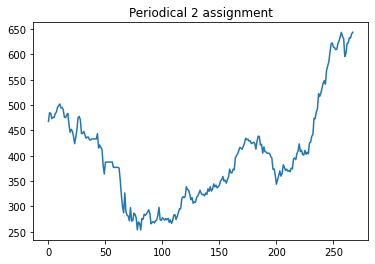

In [61]:
plt.plot(data['close '])
plt.title('Periodical 2 assignment')
plt.show()

In [62]:
data2 = data[['Daily Returns']]
data2

,Daily Returns
0,NaN
1,0.036558
2,-0.002372
3,-0.021604
4,0.006022
...,...
263,0.001448
264,0.016632
265,-0.000711
266,0.013050


In [63]:
data3 = data2[['Daily Returns']].fillna(data2[['Daily Returns']].mean())

In [64]:
data3

,Daily Returns
0,0.001645
1,0.036558
2,-0.002372
3,-0.021604
4,0.006022
...,...
263,0.001448
264,0.016632
265,-0.000711
266,0.013050


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

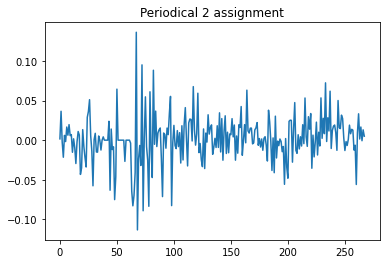

In [65]:
plt.plot(data3)
plt.title('Periodical 2 assignment')
plt.show()

In [66]:
rolling_mean = data3.rolling(window=12).mean()
rolling_std = data3.rolling(window=12).std()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

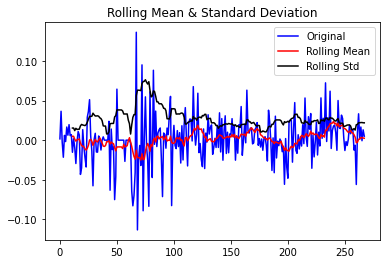

In [67]:
plt.plot(data3, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

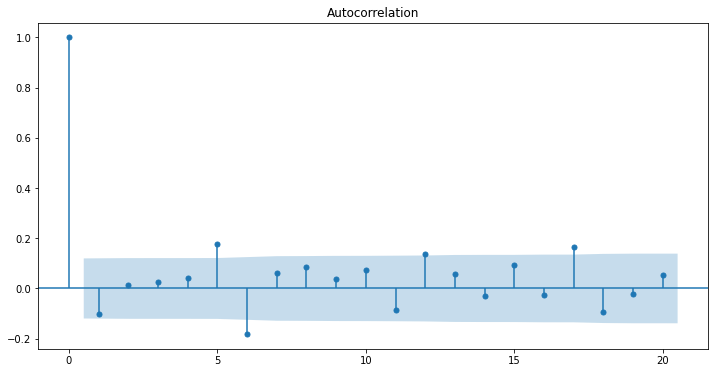

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

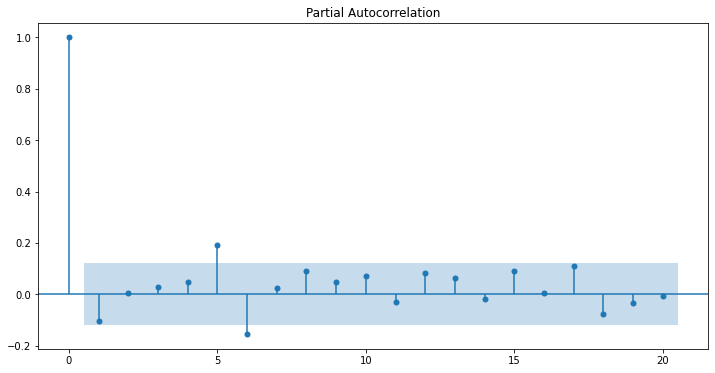

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(data3, lags=20, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(data3, lags=20, ax=ax)
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
result = adfuller(data3['Daily Returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.227348024411038
p-value: 5.0507802996828846e-08
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [72]:
n_train = int(len(data3) * 0.8)
train_data = data3[:n_train]
test_data = data3[n_train:]

In [73]:
train_data

,Daily Returns
0,0.001645
1,0.036558
2,-0.002372
3,-0.021604
4,0.006022
...,...
209,0.006871
210,-0.011107
211,0.004330
212,-0.007410


In [74]:
# Print the size of the training and test sets
print('Training data size:', len(train_data))
print('Test data size:', len(test_data))

Training data size: 214
Test data size: 54


In [75]:
from statsmodels.tsa.ar_model import AutoReg

In [76]:
# fit AR model on training data
model = AutoReg(train_data, lags=5)
model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [77]:
# make predictions on testing data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

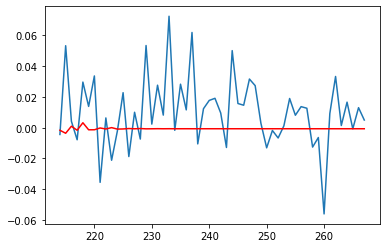

In [78]:
# plot actual and predicted values
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error


In [81]:
mse = mean_squared_error(test_data, predictions)
rmse = mse ** 0.5
print('RMSE:', rmse)

RMSE: 0.025317969288303058


In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [84]:
# Create the MA model
model = ARIMA(data3['Daily Returns'], order=(0, 0, 5))

In [85]:
# Fit the model to the data
model_fit = model.fit()

In [86]:
predictions = model_fit.predict(start=0, end=len(data)-1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

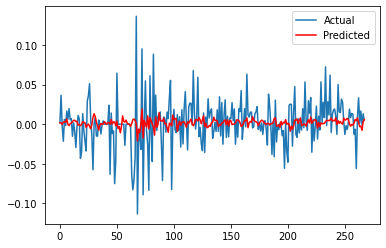

In [88]:
# Plot the actual and predicted values
plt.plot(data3['Daily Returns'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()